# 1. Import

In [1]:
import pandas as pd

file_path = r"C:\Users\imaja\OneDrive\Desktop\MBA 2022 -2024\T4\MLA1\CIA3\filtered_data.csv"

filtered_df2 = pd.read_csv(file_path)

# 2. Class Imbalance Checking

## Binary Classification

In [2]:
class_counts = filtered_df2['HDI-UN_Binary'].value_counts()

In [3]:
class_counts

Good Life Quality    154
Poor Life Quality     17
Name: HDI-UN_Binary, dtype: int64

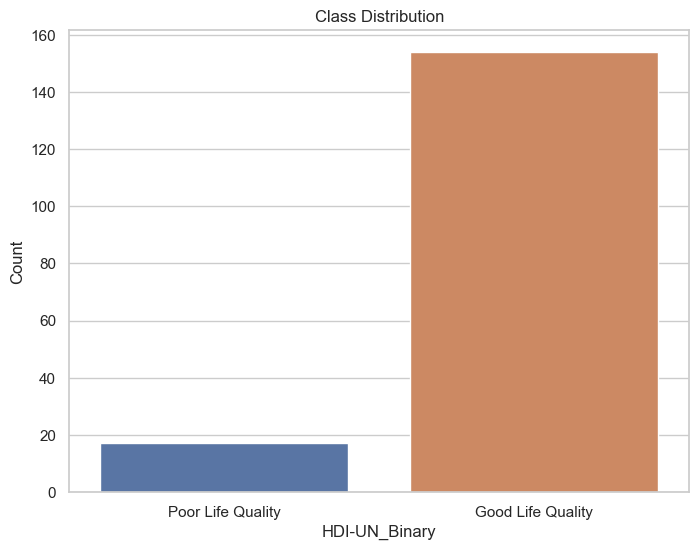

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))
sns.countplot(data=filtered_df2, x='HDI-UN_Binary')

plt.xlabel('HDI-UN_Binary')

plt.ylabel('Count')
plt.title('Class Distribution')
plt.show()


# 3. Class Imbalance Handling - Oversampling

In [5]:
#%pip install imbalanced-learn

In [6]:
from imblearn.over_sampling import RandomOverSampler

In [7]:
from sklearn.model_selection import train_test_split

# Split your dataset into features (X) and labels (y)
X, y = filtered_df2.drop(columns=['HDI-UN','HDI-UN_Binary','HDI-UN_Multiple']), filtered_df2['HDI-UN_Binary']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [8]:
print(X.shape)
print(y.shape)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)


(171, 26)
(171,)
(136, 26)
(35, 26)
(136,)
(35,)


In [9]:
# Create an instance of RandomOverSampler
oversampler = RandomOverSampler(random_state=42)

# Fit and transform the training data
X_train_resampled, y_train_resampled = oversampler.fit_resample(X_train, y_train)

In [10]:
y_train_resampled

0      Good Life Quality
1      Good Life Quality
2      Good Life Quality
3      Good Life Quality
4      Good Life Quality
             ...        
239    Poor Life Quality
240    Poor Life Quality
241    Poor Life Quality
242    Poor Life Quality
243    Poor Life Quality
Name: HDI-UN_Binary, Length: 244, dtype: object

In [11]:
y_train_resampled.value_counts()

Good Life Quality    122
Poor Life Quality    122
Name: HDI-UN_Binary, dtype: int64

# 4. Modelling - Logistic Regression

In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

In [13]:
# Create the logistic regression model
logistic_reg = LogisticRegression(random_state=42)

# Train the model on the training data
logistic_reg.fit(X_train_resampled, y_train_resampled)

d:\Softwares\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=42)

# 5. Predict

In [14]:
y_pred = logistic_reg.predict(X_test)

# 6. Model Evaluation

In [15]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Generate a classification report
report = classification_report(y_test, y_pred)
print(report)

# Display the confusion matrix
matrix = confusion_matrix(y_test, y_pred)
print(matrix)


Accuracy: 0.91
                   precision    recall  f1-score   support

Good Life Quality       0.91      1.00      0.96        32
Poor Life Quality       0.00      0.00      0.00         3

         accuracy                           0.91        35
        macro avg       0.46      0.50      0.48        35
     weighted avg       0.84      0.91      0.87        35

[[32  0]
 [ 3  0]]


d:\Softwares\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
d:\Softwares\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
d:\Softwares\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
